In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Importing dataframe
processed_df = pd.read_csv('data/processed_data/co2_country_year.csv')

In [4]:
modern_pd = processed_df.loc[processed_df['Year'] == 2019]

In [5]:
modern_pd = modern_pd.groupby('COU').Total_MTCO2.max()

In [6]:
modern_pd.describe()

count      205.000000
mean       354.256833
std       2719.250215
min          0.007328
25%          1.952912
50%         11.232139
75%         65.756232
max      37082.558969
Name: Total_MTCO2, dtype: float64

<AxesSubplot:xlabel='Total_MTCO2', ylabel='Count'>

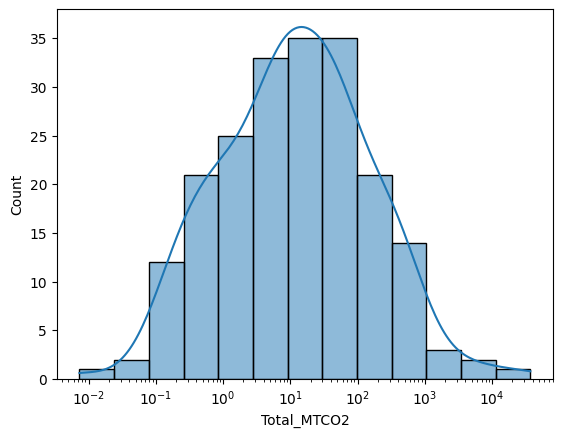

In [7]:
sns.histplot(data=modern_pd,log_scale=True, kde=True)

In [8]:
# removing massive outliers pt 1
Q1 = modern_pd.quantile(.25)
Q2 = modern_pd.quantile(.75)
IQR = Q2 - Q1

upper_bound = Q2 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [9]:
# removing massive outliers pt 2
modern_pd = modern_pd.loc[(modern_pd > lower_bound) & (modern_pd < upper_bound)]

In [10]:
modern_pd = modern_pd.loc[(modern_pd > (modern_pd.mean() - modern_pd.std()/2)) & (modern_pd < (modern_pd.mean() + modern_pd.std()/2))]
len(modern_pd)

57

In [11]:
average_processed_df = processed_df.loc[processed_df['COU'].isin(modern_pd.index)]
average_processed_df

,COU,Year,Country,Total_MTCO2,Coal,Oil,Gas,Cement,Flaring,Other,MTCO2_per_cap,GDP_per_cap,PrecievedHealth,PercentOfPopulation
9,AFG,2011,Afghanistan,11.838316,4.180624,7.335328,0.307776,0.014588,0.0,NaN,0.404740,621.912311,NaN,NaN
10,AFG,2012,Afghanistan,10.035314,3.125392,6.573216,0.307776,0.028930,0.0,NaN,0.329389,663.141053,NaN,NaN
11,AFG,2013,Afghanistan,9.250510,3.326912,5.591264,0.296784,0.035550,0.0,NaN,0.293283,651.987862,NaN,NaN
12,AFG,2014,Afghanistan,9.170309,3.705783,5.164638,0.271244,0.028644,0.0,NaN,0.280299,628.146804,NaN,NaN
13,AFG,2015,Afghanistan,9.791093,2.843264,6.624512,0.282128,0.041189,0.0,NaN,0.290076,592.476537,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,ZWE,2015,Zimbabwe,12.254954,8.060800,3.609040,0.000000,0.585114,0.0,NaN,0.865772,1410.329174,NaN,NaN
2484,ZWE,2016,Zimbabwe,10.533453,6.932288,3.140048,0.000000,0.461117,0.0,NaN,0.728822,1421.787789,NaN,NaN
2485,ZWE,2017,Zimbabwe,9.596071,5.900452,3.226752,0.000000,0.468867,0.0,NaN,0.650533,1192.107012,NaN,NaN
2486,ZWE,2018,Zimbabwe,11.795478,7.177776,4.059712,0.000000,0.557990,0.0,NaN,0.783639,2269.177012,NaN,NaN


In [12]:
#Creating dataframe for only 2011 from average countries only

average_processed_df_2011 = average_processed_df[average_processed_df['Year'] == 2011]

In [13]:
#Creating dataframe for only 2011 from all countries

processed_df_2011 = processed_df[processed_df['Year'] == 2011]

In [14]:
#Creating dataframe for only 2015 from average countries only

average_processed_df_2015 = average_processed_df[average_processed_df['Year'] == 2015]

In [15]:
#Creating dataframe for only 2015 from all countries

processed_df_2015 = processed_df[processed_df['Year'] == 2015]

In [16]:
#Creating dataframe for only 2019 from average countries only

average_processed_df_2019 = average_processed_df[average_processed_df['Year'] == 2019]

In [17]:
#Creating dataframe for only 2019 from all countries

processed_df_2019 = processed_df[processed_df['Year'] == 2019]

In [18]:
badhealth_df = processed_df[processed_df['PrecievedHealth'] == 'Bad']

Text(0.5, -0.01, 'Figure 1.1')

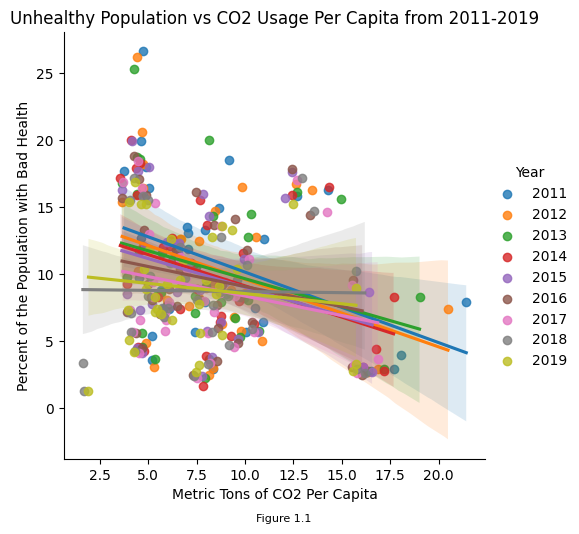

In [43]:
#Creating plot for all years of the dataset showing the percent of each country's population
#with bad health vs the metric tons of CO2 per capita.

sns.lmplot(data=badhealth_df, x='MTCO2_per_cap', y='PercentOfPopulation', hue='Year')
plt.xlabel('Metric Tons of CO2 Per Capita')
plt.ylabel('Percent of the Population with Bad Health')
plt.title('Unhealthy Population vs CO2 Usage Per Capita from 2011-2019')
plt.figtext(0.5, -0.01, 'Figure 1.1', wrap=True, horizontalalignment='center', fontsize=8)


Text(0.5, -0.01, 'Figure 1.2')

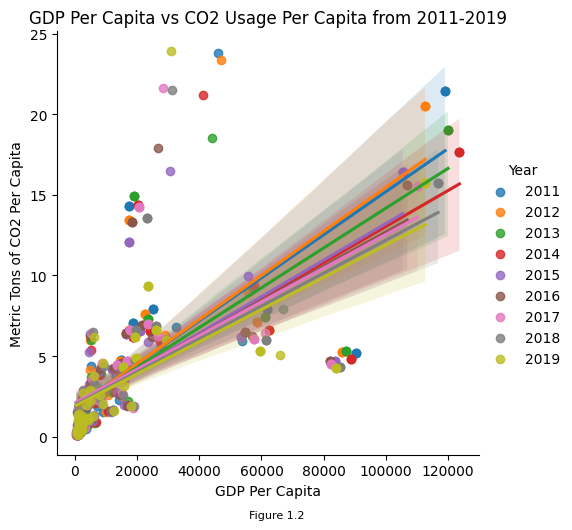

In [54]:
#Creating plot for all years of GDP per capita vs metric tons of CO2 per capita for each year

sns.lmplot(data=average_processed_df, x='GDP_per_cap', y='MTCO2_per_cap', hue='Year')
plt.xlabel('GDP Per Capita')
plt.ylabel('Metric Tons of CO2 Per Capita')
plt.title('GDP Per Capita vs CO2 Usage Per Capita from 2011-2019')
plt.figtext(0.5, -0.01, 'Figure 1.2', wrap=True, horizontalalignment='center', fontsize=8)


Intercept: 1.8589066707760775
Slope: 0.0001333510469310751


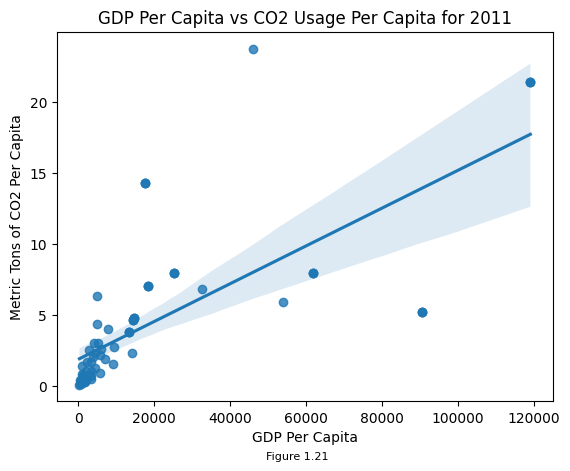

In [53]:
#Creating a plot for GDP Per capita vs Metric Tons of CO2 per capita for JUST 2011
plot2011 = sns.regplot(average_processed_df_2011['GDP_per_cap'], average_processed_df_2011['MTCO2_per_cap'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Metric Tons of CO2 Per Capita')
plt.title('GDP Per Capita vs CO2 Usage Per Capita for 2011')
plt.figtext(0.5, -0.01, 'Figure 1.21', wrap=True, horizontalalignment='center', fontsize=8)

#Calculating slope and intercept of the graph
slope, intercept, r, plot2011, sterr = scipy.stats.linregress(x=plot2011.get_lines()[0].get_xdata(), y=plot2011.get_lines()[0].get_ydata())
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: 1.8978422747896255
Slope: 0.00011319817864386055


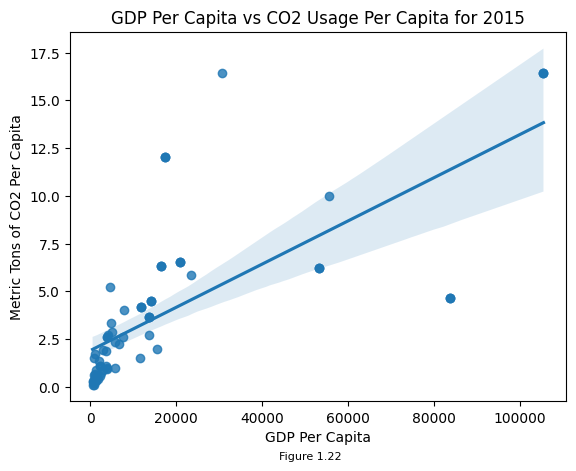

In [56]:
#Creating a plot for GDP Per capita vs Metric Tons of CO2 per capita for JUST 2015

plot2015 = sns.regplot(average_processed_df_2015['GDP_per_cap'], average_processed_df_2015['MTCO2_per_cap'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Metric Tons of CO2 Per Capita')
plt.title('GDP Per Capita vs CO2 Usage Per Capita for 2015')
plt.figtext(0.5, -0.01, 'Figure 1.22', wrap=True, horizontalalignment='center', fontsize=8)

#Calculating slope and intercept of the graph
slope, intercept, r, plot2015, sterr = scipy.stats.linregress(x=plot2015.get_lines()[0].get_xdata(), y=plot2015.get_lines()[0].get_ydata())
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: 1.8989406257517762
Slope: 9.985320511921273e-05


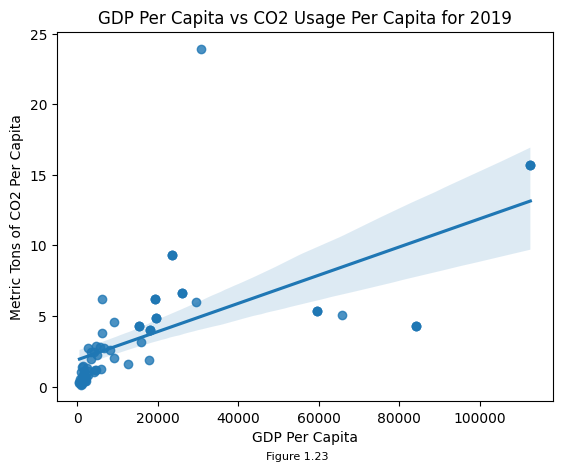

In [57]:
#Creating a plot for GDP Per capita vs Metric Tons of CO2 per capita for JUST 2015

plot2019 = sns.regplot(average_processed_df_2019['GDP_per_cap'], average_processed_df_2019['MTCO2_per_cap'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Metric Tons of CO2 Per Capita')
plt.title('GDP Per Capita vs CO2 Usage Per Capita for 2019')
plt.figtext(0.5, -0.01, 'Figure 1.23', wrap=True, horizontalalignment='center', fontsize=8)

#Calculating slope and intercept of the graph
slope, intercept, r, plot2019, sterr = scipy.stats.linregress(x=plot2019.get_lines()[0].get_xdata(), y=plot2019.get_lines()[0].get_ydata())
print('Intercept:', intercept)
print('Slope:', slope)

In [32]:
#Refining 2011, 2015, and 2019 databases to just Bad percentages of perceived health.

badhealth_df_2011 = processed_df_2011[processed_df_2011['PrecievedHealth'] == 'Bad']

badhealth_df_2015 = processed_df_2015[processed_df_2015['PrecievedHealth'] == 'Bad']

badhealth_df_2019 = processed_df_2019[processed_df_2019['PrecievedHealth'] == 'Bad']

Making 3 plots for specific years to highlight differences in slope for Bad Health of a
population vs metric tons of CO2 per capita.

Intercept: 15.414404993313465
Slope: -0.5257478951988596


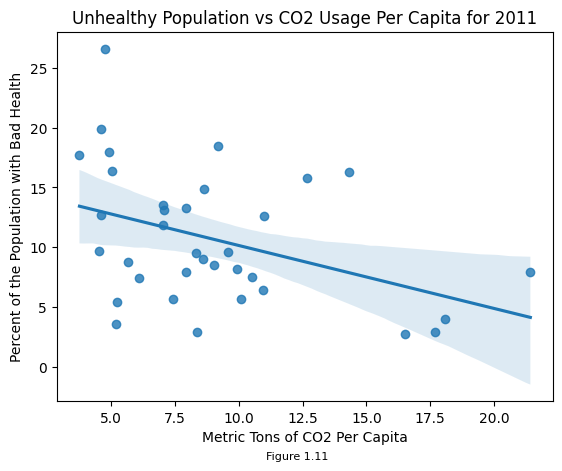

In [49]:
#Creating a plot for Percent of a population with bad health
#vs Metric Tons of CO2 per capita for JUST 2011

badhealthplot2011 = sns.regplot(badhealth_df_2011['MTCO2_per_cap'], badhealth_df_2011['PercentOfPopulation'])
plt.xlabel('Metric Tons of CO2 Per Capita')
plt.ylabel('Percent of the Population with Bad Health')
plt.title('Unhealthy Population vs CO2 Usage Per Capita for 2011')
plt.figtext(0.5, -0.01, 'Figure 1.11', wrap=True, horizontalalignment='center', fontsize=8)

#Calculating slope and intercept of the graph
slope, intercept, r, badhealthplot2011, sterr = scipy.stats.linregress(x=badhealthplot2011.get_lines()[0].get_xdata(), y=badhealthplot2011.get_lines()[0].get_ydata())
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: 13.303367320369968
Slope: -0.42746593383221243


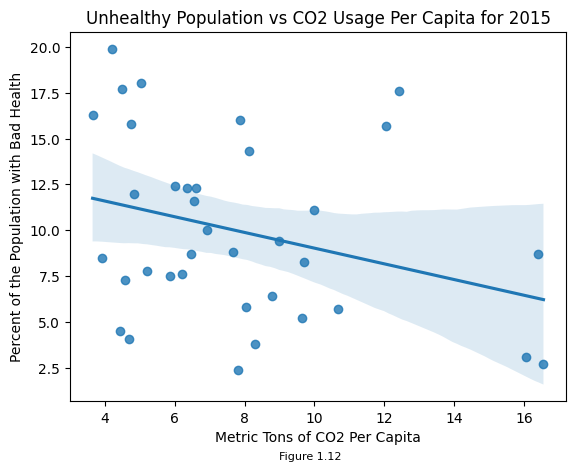

In [50]:
#Creating a plot for Percent of a population with bad health
#vs Metric Tons of CO2 per capita for JUST 2015

badhealthplot2015 = sns.regplot(badhealth_df_2015['MTCO2_per_cap'], badhealth_df_2015['PercentOfPopulation'])
plt.xlabel('Metric Tons of CO2 Per Capita')
plt.ylabel('Percent of the Population with Bad Health')
plt.title('Unhealthy Population vs CO2 Usage Per Capita for 2015')
plt.figtext(0.5, -0.01, 'Figure 1.12', wrap=True, horizontalalignment='center', fontsize=8)

#Calculating slope and intercept of the graph
slope, intercept, r, badhealthplot2015, sterr = scipy.stats.linregress(x=badhealthplot2015.get_lines()[0].get_xdata(), y=badhealthplot2015.get_lines()[0].get_ydata())
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: 10.072117631424744
Slope: -0.15172482076542476


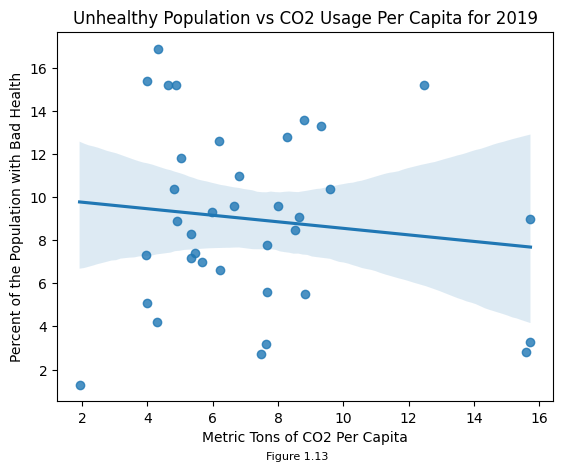

In [52]:
#Creating a plot for Percent of a population with bad health
#vs Metric Tons of CO2 per capita for JUST 2019

badhealthplot2019 = sns.regplot(badhealth_df_2019['MTCO2_per_cap'], badhealth_df_2019['PercentOfPopulation'])
plt.xlabel('Metric Tons of CO2 Per Capita')
plt.ylabel('Percent of the Population with Bad Health')
plt.title('Unhealthy Population vs CO2 Usage Per Capita for 2019')
plt.figtext(0.5, -0.01, 'Figure 1.13', wrap=True, horizontalalignment='center', fontsize=8)

#Calculating slope and intercept of the graph
slope, intercept, r, badhealthplot2019, sterr = scipy.stats.linregress(x=badhealthplot2019.get_lines()[0].get_xdata(), y=badhealthplot2019.get_lines()[0].get_ydata())
print('Intercept:', intercept)
print('Slope:', slope)